In [279]:
import os
#import requests
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import timeit 
import matplotlib.pyplot as plt

In [136]:
def download_data():
    if not os.path.exists("data1"):
        os.makedirs("data1")    

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
    """
    hpc = requests.get(url)
    with open("data1/household_power_consumption.zip", 'wb') as file:
        file.write(hpc.content)
    """
    hpc = urlopen(url)
 
    with open("data1/household_power_consumption.zip", 'wb') as file:
        for line in hpc:
             file.write(line)

    with ZipFile("data1/household_power_consumption.zip") as zipFile:
        zipFile.extractall("data1")

In [132]:
download_data()

# Используя датафрейм

In [164]:
def read_to_frame():
    #file_name = os.path.join('data1', "*.txt")
    #print (file_name)
    df = pd.read_csv("data1/household_power_consumption.txt", sep=";", index_col=False, header=0) 
    return df

In [165]:
%%time
df = read_to_frame()
df

C:\Users\Acer\Anaconda3\envs\myenv\lib\site-packages\IPython\core\magic.py:187: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


Wall time: 2.85 s


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [166]:
def clear_data(df):
    cols = ['Active_P', 'Reactive_P', 'Voltage', 'Intensity', 'Sub_m_1', 'Sub_m_2', 'Sub_m_3']
    df['DateTime'] = pd.to_datetime(df['Date']+df['Time'], format="%d/%m/%Y%H:%M:%S")
    df.drop(['Date', 'Time'], axis=1, inplace=True)
    df.set_index('DateTime', inplace=True)
    df.columns = cols
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df.dropna(axis=0, inplace=True)
    return df

In [167]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [168]:
%%time
clear_data(df)

Wall time: 18 s


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [169]:
df.dtypes

Active_P      float64
Reactive_P    float64
Voltage       float64
Intensity     float64
Sub_m_1       float64
Sub_m_2       float64
Sub_m_3       float64
dtype: object

In [170]:
df.isnull().any()

Active_P      False
Reactive_P    False
Voltage       False
Intensity     False
Sub_m_1       False
Sub_m_2       False
Sub_m_3       False
dtype: bool

## Выбрать строки, где общая активная мощность > 5 кВт

In [171]:
def active_power(df, min_pow):
    return df[df.Active_P>min_pow]

In [258]:
for i in range(1, 7):
    i=10**i
    print(timeit.timeit('active_power(df[:i], 5)',number=10, globals = globals()))

0.019054100004723296
0.014547500002663583
0.017926600005012006
0.017063000006601214
0.01846980000846088
0.04686760000186041


## Выбрать строки, в которых вольтаж превышает 235 В

In [173]:
def voltage (df, min_v):
    return df[df.Voltage>min_v]

In [174]:
%%time
voltage (df, 235)

Wall time: 135 ms


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


##  Выбрать все строки, в которых сила тока лежит в пределах 19-20А, для них определить те, в которых стиральная машина и холодильник потребляют больше, чем бойлер и кондиционер

сила тока - intensity

sub_m_1: посудомойка, микроволновка

sub_m_2: стиральная машина, холодильник, сушка (хз как правильно), свет

sub_m_3: бойлер, кондиционер

In [175]:
def intensity_and_sub_m (df, min_i, max_i):
    return df[(df.Intensity>=min_i)&(df.Intensity<=max_i)&(df.Sub_m_2>df.Sub_m_3)]

In [176]:
%%time
intensity_and_sub_m (df, 19, 20)

Wall time: 26 ms


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2006-12-16 18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
2006-12-17 01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
2006-12-17 01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
2006-12-17 01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
2006-12-17 01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...
2010-11-24 07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2010-11-24 07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2010-11-24 07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0


## Выбрать случайным образом 500000 строк (без повторов элементов выборки), для них вычислить средние величины всех 3х групп потребления электроэнегрии

In [230]:
num=500000
df_rand = df.sample(n=num)


In [233]:
def mean_rand(df):
    mean1 = df_rand['Sub_m_1'].mean()
    mean2 = df_rand['Sub_m_2'].mean()
    mean3 = df_rand['Sub_m_3'].mean()
   # print(f"mean of S_m_1 = {mean1}")
    #print(f"mean of S_m_2 = {mean2}")
    #print(f"mean of S_m_3 = {mean3}")
    #df_rand['Mean'] = df_rand[['Sub_m_1','Sub_m_2', 'Sub_m_3']].mean(1)
    #df_rand.drop(['Sub_m_1', 'Sub_m_2', 'Sub_m_3'], axis=1, inplace=True)
    #return df_rand

In [234]:
%%timeit
mean_rand(df)

17.9 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Выбрать те строки, в которых домохозяйства после 18:00 потребляют больше 6 кВт в минуту в среднем. Среди выбранных строк определить те, в которых основное употребление электроенергии выпадает на стиралку (группа 2). Потом выбрать каждый третий результат из первой половины и каждый четвертый результат из второй половины


In [235]:
def time_and_active_p(df, min_h, min_p):
    df_t = df[(df.index.hour>=min_h)&(df.Active_P>min_p)]
    df_t = df_t[(df_t.Sub_m_1<df_t.Sub_m_2)&(df_t.Sub_m_3<df_t.Sub_m_2)]
    return df_t

In [236]:
%%time
df_t = time_and_active_p(df_rand, 18, 6)

Wall time: 81.4 ms


In [237]:
df_t

,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2009-03-17 20:23:00,7.058,0.116,237.27,30.0,0.0,64.0,18.0
2007-03-20 21:33:00,6.244,0.142,234.56,26.6,2.0,35.0,17.0
2009-01-10 20:02:00,8.082,0.066,232.36,34.8,36.0,71.0,17.0
2008-11-23 18:34:00,6.168,0.308,231.57,26.6,0.0,22.0,17.0
2007-02-15 19:40:00,6.360,0.448,234.94,27.2,0.0,37.0,17.0
...,...,...,...,...,...,...,...
2007-01-09 20:54:00,7.732,0.098,231.55,33.4,0.0,70.0,17.0
2009-08-26 20:38:00,7.056,0.308,236.35,29.8,38.0,39.0,18.0
2009-03-31 20:33:00,7.060,0.190,232.85,30.2,0.0,71.0,17.0


In [182]:
def first_step_3(df):
    return df.iloc[:int(len(df)/2):3] 

def second_step_4(df):
    return df.iloc[int(len(df)/2)::4]

In [183]:
%%time
first_step_3(df_t)

Wall time: 991 µs


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2006-12-16 18:05:00,6.052,0.192,232.93,26.2,0.0,37.0,17.0
2006-12-16 18:08:00,6.308,0.116,232.25,27.0,0.0,36.0,17.0
2006-12-28 20:58:00,6.386,0.374,236.63,27.0,1.0,36.0,17.0
2006-12-28 21:02:00,8.088,0.262,235.50,34.4,1.0,72.0,17.0
2006-12-28 21:05:00,7.230,0.152,235.22,30.6,1.0,73.0,17.0
...,...,...,...,...,...,...,...
2008-03-23 20:28:00,7.268,0.192,233.61,31.0,0.0,72.0,17.0
2008-03-23 20:31:00,6.958,0.188,233.62,29.8,0.0,73.0,17.0
2008-03-23 20:34:00,6.668,0.180,233.65,28.4,0.0,73.0,17.0


In [238]:
%%time
second_step_4(df_t)

Wall time: 997 µs


,Active_P,Reactive_P,Voltage,Intensity,Sub_m_1,Sub_m_2,Sub_m_3
DateTime,,,,,,,
2009-02-23 22:08:00,6.848,0.218,234.64,29.4,1.0,67.0,17.0
2008-03-05 21:38:00,6.580,0.092,233.98,28.0,2.0,36.0,17.0
2007-08-12 23:32:00,7.288,0.230,226.82,32.2,28.0,33.0,16.0
2007-01-22 20:26:00,7.722,0.220,233.22,33.0,0.0,71.0,17.0
2010-01-15 20:56:00,7.914,0.466,236.01,33.6,9.0,74.0,17.0
2007-03-20 21:45:00,6.134,0.280,232.25,26.4,1.0,36.0,16.0
2010-11-20 18:34:00,6.266,0.360,229.82,27.6,14.0,35.0,16.0
2007-12-08 20:24:00,6.126,0.292,234.03,26.2,0.0,35.0,17.0
2008-10-12 19:35:00,6.968,0.358,232.40,30.0,0.0,72.0,17.0


# Используя Numpy

In [185]:
import numpy as np

In [199]:
%%time
file_name = "data1/household_power_consumption.txt"
cols = ['Date', 'Time','Active_P','Reactive_P','Voltage','Intensity','S_m_1', 'S_m_2', 'S_m_3']
n_t = {
    'names':cols,
    'formats':['U10', 'U10', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8']
}

arr = np.genfromtxt(file_name, delimiter=';',  skip_header=1, dtype=n_t ,missing_values=['?'])

Wall time: 31.1 s


In [200]:
arr


array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

In [201]:
cols[2:9]

['Active_P', 'Reactive_P', 'Voltage', 'Intensity', 'S_m_1', 'S_m_2', 'S_m_3']

In [223]:
np.isnan(arr['Active_P'])

array([False, False, False, ..., False, False, False])

In [202]:
%%time
nan_mask = np.zeros((len(arr)), dtype=bool)
print(nan_mask)
for column in cols[2:8]:
    nan_mask = np.isnan(arr[column])
    arr =  arr[~nan_mask]
print(arr)
print(len(arr))

[False False False ... False False False]
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.) ...
 ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.)
 ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)]
2049280
Wall time: 1.4 s


## Выбрать строки, где общая активная мощность > 5 кВт


In [260]:
def arr_pow(arr, n):
    return arr[arr['Active_P'] > n]


(1.0, 1000000.0, 0.0, 0.05)

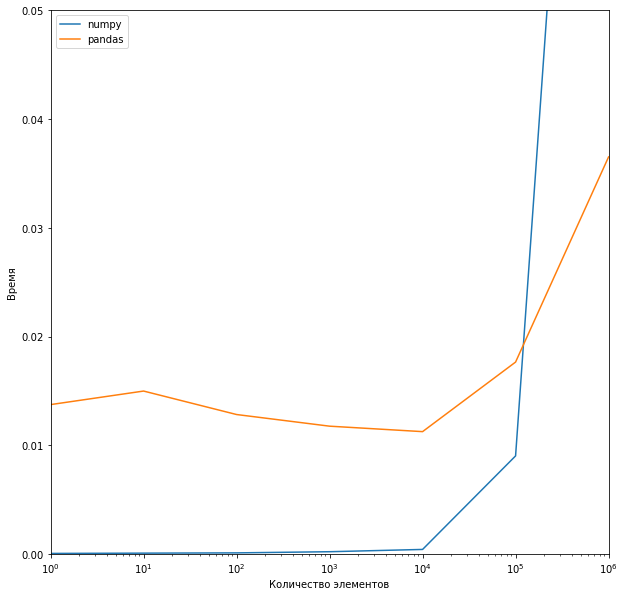

In [327]:
y1 = []
y2 = []
x = []
for i in range(0, 7):
    i=10**i
    x.append(i)
    y1.append(timeit.timeit('arr_pow(arr[:i], 5)',number=10, globals = globals()))
    y2.append(timeit.timeit('active_power(df[:i], 5)',number=10, globals = globals()))
    
plt.figure(figsize=(10,10))
f1 = plt.semilogx(x, y1, label="task1")
f2 = plt.semilogx(x, y2, label="task2")
plt.legend(['numpy', 'pandas'])
plt.xlabel("Количество элементов")
plt.ylabel("Время")
plt.axis([1, 1000000, 0, 0.05])

#print(x, y1)



In [324]:
%%time
arr_pow(arr, 5)

Wall time: 251 ms


array([('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.),
       ...,
       ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.),
       ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.),
       ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

## Выбрать строки, в которых вольтаж превышает 235 В

In [205]:
def arr_volt():
    return arr[arr['Voltage'] > 235]

In [206]:
%%time
arr_volt()

Wall time: 204 ms


array([('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

##  Выбрать все строки, в которых сила тока лежит в пределах 19-20А, для них определить те, в которых стиральная машина и холодильник потребляют больше, чем бойлер и кондиционер

In [207]:
def arr_intensity():
    res = arr[(arr['Intensity'] > 10) & (arr['Intensity']<20)&(arr['S_m_2']>arr['S_m_3'])]
    return res

In [208]:
%%time
arr_intensity()

Wall time: 77.8 ms


array([('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.),
       ('16/12/2006', '18:10:00', 3.396, 0.148, 236.2 , 15. , 0., 22., 18.),
       ('16/12/2006', '18:12:00', 3.73 , 0.144, 235.78, 16.4, 0., 27., 17.),
       ...,
       ('25/11/2010', '20:11:00', 2.766, 0.15 , 240.3 , 11.8, 0.,  2.,  0.),
       ('25/11/2010', '20:12:00', 2.562, 0.158, 240.63, 11. , 0.,  1.,  0.),
       ('25/11/2010', '20:13:00', 2.886, 0.16 , 239.7 , 12.2, 0.,  1.,  0.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

## Выбрать случайным образом 500000 строк (без повторов элементов выборки), для них вычислить средние величины всех 3х групп потребления электроэнегрии

In [209]:
def rand_arr():
    return arr[np.random.choice(np.arange(0,len(arr)), 500000, replace=False)]


In [210]:
%%time
rand_arr = rand_arr()

Wall time: 351 ms


In [239]:
rand_arr

array([('28/2/2007', '20:46:00', 0.212, 0.   , 238.39,  0.8, 0.,  0.,  0.),
       ('12/12/2009', '01:55:00', 0.314, 0.104, 245.42,  1.2, 0.,  0.,  0.),
       ('19/12/2006', '21:46:00', 0.628, 0.   , 243.53,  3. , 0.,  0.,  0.),
       ...,
       ('16/7/2008', '21:24:00', 4.218, 0.134, 238.39, 17.6, 0., 37., 18.),
       ('21/9/2009', '04:12:00', 0.262, 0.104, 242.64,  1.2, 0.,  1.,  0.),
       ('8/11/2010', '05:47:00', 0.268, 0.   , 245.04,  1. , 0.,  0.,  1.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

In [241]:
len(np.unique(rand_arr))

500000

In [212]:
def mean_arr():
    mean_1 = np.mean(rand_arr['S_m_1'])
    mean_2 = np.mean(rand_arr['S_m_2'])
    mean_3 = np.mean(rand_arr['S_m_3'])
    print(f"mean of S_m_1 = {mean_1}")
    print(f"mean of S_m_2 = {mean_2}")
    print(f"mean of S_m_3 = {mean_3}")

In [213]:
%%time
mean_arr()

mean of S_m_1 = 1.121314
mean of S_m_2 = 1.29993
mean of S_m_3 = 6.470208
Wall time: 22.9 ms


## Выбрать те строки, в которых домохозяйства после 18:00 потребляют больше 6 кВт в минуту в среднем. Среди выбранных строк определить те, в которых основное употребление электроенергии выпадает на стиралку (группа 2). Потом выбрать каждый третий результат из первой половины и каждый четвертый результат из второй половины

In [224]:
%%time
condition = np.logical_and.reduce([ arr['Time'] >="18:00:00",arr['Active_P']>6, 
                                   arr['S_m_2'] > arr["S_m_3"], arr["S_m_1"]<arr["S_m_2"] ])
arr1 = arr[condition]

Wall time: 583 ms


In [225]:
condition


array([False, False, False, ..., False, False, False])

In [226]:
arr1


array([('16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2,  0., 37., 17.),
       ('16/12/2006', '18:06:00', 6.752, 0.186, 232.12, 29. ,  0., 36., 17.),
       ('16/12/2006', '18:07:00', 6.474, 0.144, 231.85, 27.8,  0., 37., 16.),
       ...,
       ('20/11/2010', '18:46:00', 6.438, 0.308, 229.26, 28.4, 13., 39., 16.),
       ('20/11/2010', '18:49:00', 6.21 , 0.174, 228.82, 27.4, 21., 34., 17.),
       ('20/11/2010', '18:52:00', 6.364, 0.126, 229.38, 28.2, 17., 34., 16.)],
      dtype=[('Date', '<U10'), ('Time', '<U10'), ('Active_P', '<f8'), ('Reactive_P', '<f8'), ('Voltage', '<f8'), ('Intensity', '<f8'), ('S_m_1', '<f8'), ('S_m_2', '<f8'), ('S_m_3', '<f8')])

In [227]:
middle = int(len(arr1)/2)
middle


530

In [228]:
%%time
arr1[0:middle:3]

Wall time: 0 ns


array([('16/12/2006', '18:05:00',  6.052, 0.192, 232.93, 26.2,  0., 37., 17.),
       ('16/12/2006', '18:08:00',  6.308, 0.116, 232.25, 27. ,  0., 36., 17.),
       ('28/12/2006', '20:58:00',  6.386, 0.374, 236.63, 27. ,  1., 36., 17.),
       ('28/12/2006', '21:02:00',  8.088, 0.262, 235.5 , 34.4,  1., 72., 17.),
       ('28/12/2006', '21:05:00',  7.23 , 0.152, 235.22, 30.6,  1., 73., 17.),
       ('28/12/2006', '21:08:00',  7.352, 0.   , 235.45, 31.2,  1., 73., 17.),
       ('28/12/2006', '21:11:00',  9.048, 0.   , 231.48, 39. , 34., 71., 16.),
       ('28/12/2006', '21:14:00',  9.118, 0.108, 231.18, 39.4, 36., 72., 16.),
       ('28/12/2006', '21:17:00',  7.04 , 0.13 , 233.27, 30.2, 37., 38., 17.),
       ('29/12/2006', '21:16:00',  6.146, 0.116, 230.53, 26.6,  0., 70.,  0.),
       ('29/12/2006', '21:19:00',  6.184, 0.138, 231.57, 26.6,  0., 70.,  0.),
       ('29/12/2006', '21:22:00',  6.214, 0.12 , 230.53, 26.8,  0., 70.,  0.),
       ('29/12/2006', '21:25:00',  6.086, 0.   , 229

In [229]:
%%time
arr1[middle:len(arr):4]

Wall time: 0 ns


array([('20/4/2008', '21:03:00', 7.798, 0.328, 231.76, 33.6,  1., 71., 17.),
       ('20/4/2008', '21:07:00', 7.452, 0.346, 232.31, 32.2,  1., 68., 17.),
       ('20/4/2008', '21:11:00', 6.436, 0.382, 232.1 , 27.6,  1., 37., 17.),
       ('20/4/2008', '21:15:00', 6.2  , 0.216, 232.51, 26.6,  1., 37., 17.),
       ('18/5/2008', '20:30:00', 6.76 , 0.236, 234.9 , 29.8,  2., 52., 28.),
       ('18/5/2008', '20:34:00', 7.34 , 0.18 , 233.02, 31.4,  1., 71., 24.),
       ('18/5/2008', '20:47:00', 6.342, 0.076, 235.23, 27.2, 27., 37., 18.),
       ('8/6/2008', '21:42:00', 6.474, 0.136, 235.9 , 27.6,  0., 64., 18.),
       ('8/6/2008', '21:46:00', 6.962, 0.132, 234.92, 29.6,  0., 72., 18.),
       ('8/6/2008', '21:50:00', 6.26 , 0.   , 235.65, 26.8,  0., 71., 17.),
       ('3/7/2008', '21:38:00', 6.33 , 0.   , 234.3 , 27. ,  1., 71., 18.),
       ('3/7/2008', '21:42:00', 7.126, 0.   , 233.49, 30.8, 27., 63., 18.),
       ('16/7/2008', '21:01:00', 6.26 , 0.336, 236.12, 26.4,  0., 74., 18.),
    

In [250]:
%%timeit -n 40
arr1[(arr1['Time']>"19:00:00")&(arr1['Active_P']>5)]

52.7 µs ± 9.94 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)


In [251]:
%%timeit -n 40
cond = np.logical_and.reduce([ arr1['Time'] >="19:00:00" ,(arr1['Active_P']>5)])
arr1[cond]

61 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 40 loops each)
